In [1]:
#from datasets import Dataset, load_dataset
import pandas as pd
import numpy as np
import itertools
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

startTime = datetime.datetime.now()
aug_df = pd.DataFrame()

def print_example(contexts,questions,answers,i=0):
    print('\nContext: {}'.format(contexts[i]))
    print('Question: {}'.format(questions[i]))
    print('Answer: {}'.format(answers[i]))

max_cap = 100000
save_data = False

### Animals - subtraction - Simple Math

In [2]:
animals = ['pandas','bears','sharks','elephants','giraffes','monkeys','pigs','cows','fish','lions','tigers','snow leopards']
foods = ['grapes','walnuts','fruit','apples','fish','pizza','watermelon','steak','churros','dog food']
desc_part = ['all over the world',
             'throughout the continent',
             'in the forest',
             'in the plains',
             'in various ecosystems',
             'on a particular island',
             'on an island',
             'in the United States',
             'in Sweden',
             'in Australia',
             'in Brazil']
filler_sentence = ['Many animals do not like this animal',
                   'They all like to eat different things',
                   'Sometimes they grow very big',
                   'They are often quite small',
                   'They like to sleep for many hours']
beg_item = ['One study estimates that',
            'I heard somewhere that',
            'Sources say that']
intro = ['There are lots of',
         'On planet Earther, there are many',
         'Let us talk of']


context_template = '{} {} {}. {}. {} {}% of {} like to eat {}.'
question_template = 'What percentage of {} do not like to eat {}?'
answer_template = '{}'

questions = []
contexts = []
answers = []

x = itertools.product(animals,filler_sentence,foods,desc_part,beg_item,intro)
for i in x:
    c = round(np.random.uniform(0,100),2)

    a = round(100 - c,2)
    contexts.append(context_template.format(i[5],i[0],i[3],i[1],i[4],c,i[0],i[2]))
    questions.append(question_template.format(i[0],i[2]))
    answers.append(answer_template.format(a))
    

#include generated questions in aug_df
df = pd.DataFrame([contexts,questions,answers]).T.rename(columns={0:'context',1:'question',2:'answer'})
df['qtype'] = 'subtraction'
df['topic'] = 'animals'

if(len(df) > max_cap):
    df = df.sample(max_cap)
    
print('Adding {:,} records to the augmented dataset'.format(len(df)))
aug_df = pd.concat([aug_df,df])
print_example(contexts,questions,answers)

Adding 59,400 records to the augmented dataset

Context: There are lots of pandas all over the world. Many animals do not like this animal. One study estimates that 4.33% of pandas like to eat grapes.
Question: What percentage of pandas do not like to eat grapes?
Answer: 95.67


### Sports - grouping calculation - Simple Math 

In [3]:
teams = ['Lakers','Bucks','Knicks','Timberwolves','Warriors','Miami Heat','Wizards','Celtics','Raptors','Thunder']
intro = ['It was a painful season for the {}',
         'Despite high hopes, the {} had a tough season',
         'It was a pretty good season for the {}',
         'In a mediocre season for the {}',
         'We saw a surprising season from the {} this year',
         'What a wonderful time to be a basketball fan, especially a fan of the {}',
         'The {} really shocked the world this season']
desc = ['There were a total of {} games played in the season',
         'The team played only {} games this season due to covid cancellations',
         'They played a total of {} games',
         'They faced a tough schedule for many of their {} games',
         'The team was criticized for having easy opponents for many of their {} games this season',
         'They came off high expectations after a great season last year, but this year they had to play {} games']
first = ['In the first half of the season, they won {} and lost {} games',
         'They had a slow with just {} wins and {} losses',
         'A strange start to the season had them at {} wins, with {} losses',
         'Much of the initial optimism was dashed when they began the season with {} wins and {} losses',
         'In a strong beginning to the season they won {} games and lost just {}']
filler = ['However they rallied at mid-season',
          'But this was just the beginning',
          'An injury to one of their star players made the second half of the season difficult',
          'They overcame diversity when one of their star players tore his ACL',
          'Their coach eventually benched the star player',
          'Issues from the coronavirus made games difficult this year']
second = ['The {} went on to win {} more games',
          'The {} rallied to win {} games the rest of the season',
          'But there was little luck for the {}, who won just {} more games',
          'Many wrote off the {}, but they went on to win {} more games']
conclusion = ['Hopefully they will have a better season next year',
              'What a great end to a suspensful year',
              'They really surprised everyone this time',
              'Some coaching changes are likely to happen this offseason',
              'The team deserves some much-needed rest before next year begins',
              'After such a suspensful season, they are sure to enjoy the offseason']
results = ['win','lose']

context_template = '{}. {}. {}. {}. {}. {}.'
question_template = 'How many games did the {} {} in the season?'
answer_template = '{}'

questions = []
contexts = []
answers = []

x = itertools.product(intro,desc,first,filler,second,conclusion,results)
for i in x:
    
    tot = np.random.randint(60,120)
    first_w = np.random.randint(0,np.ceil(tot/2))
    first_l = int(np.ceil(tot/2) - first_w)
    tot_2 = int(tot - first_w - first_l)
    second_w = np.random.randint(0,tot_2)
    second_l = int(tot_2 - second_w)
    wins = int(first_w + second_w)
    loses = int(first_l + second_l)
    
    team = np.random.choice(teams)
    intro_sent = i[0].format(team)
    desc_sent = i[1].format(tot)
    first_sent = i[2].format(first_w,first_l)
    filler_sent = i[3]
    second_sent = i[4].format(team,second_w)
    conclusion_sent = i[5]
    result = i[6]
    
    contexts.append(context_template.format(intro_sent,desc_sent,first_sent,filler_sent,second_sent,conclusion_sent))
    questions.append(question_template.format(team,result))
    if result == 'win':
        answers.append(answer_template.format(wins))
    else:
        answers.append(answer_template.format(loses))
    
#include generated questions in aug_df
df = pd.DataFrame([contexts,questions,answers]).T.rename(columns={0:'context',1:'question',2:'answer'})
df['qtype'] = 'grouping'
df['topic'] = 'sports'

if(len(df) > max_cap):
    df = df.sample(max_cap)
    
print('Adding {:,} records to the augmented dataset'.format(len(df)))
aug_df = pd.concat([aug_df,df])
print_example(contexts,questions,answers)

Adding 60,480 records to the augmented dataset

Context: It was a painful season for the Celtics. There were a total of 85 games played in the season. In the first half of the season, they won 23 and lost 20 games. However they rallied at mid-season. The Celtics went on to win 33 more games. Hopefully they will have a better season next year.
Question: How many games did the Celtics win in the season?
Answer: 56


### Sports - grouping calculation and recall

In [4]:
teams = ['Lakers','Bucks','Knicks','Timberwolves','Warriors','Miami Heat','Wizards','Celtics','Raptors','Thunder']
intro = ['It was a painful season for the {}',
         'Despite high hopes, the {} had a tough season',
         'It was a pretty good season for the {}',
         'In a mediocre season for the {}',
         'We saw a surprising season from the {} this year',
         'What a wonderful time to be a basketball fan, especially a fan of the {}',
         'The {} really shocked the world this season']
desc = ['There were a total of {} games played in the season',
         'The team played only {} games this season due to covid cancellations',
         'They played a total of {} games',
         'They faced a tough schedule for many of their {} games',
         'The team was criticized for having easy opponents for many of their {} games this season',
         'They came off high expectations after a great season last year, but this year they had to play {} games']
first = ['In the first half of the season, they won {} and lost {} games',
         'They had a slow with just {} wins and {} losses',
         'A strange start to the season had them at {} wins, with {} losses',
         'Much of the initial optimism was dashed when they began the season with {} wins and {} losses',
         'In a strong beginning to the season they won {} games and lost just {}']
filler = ['However they rallied at mid-season',
          'But this was just the beginning',
          'An injury to one of their star players made the second half of the season difficult',
          'They overcame diversity when one of their star players tore his ACL',
          'Their coach eventually benched the star player',
          'Issues from the coronavirus made games difficult this year']
second = ['The {} went on to win {} more games',
          'The {} rallied to win {} games the rest of the season',
          'But there was little luck for the {}, who won just {} more games',
          'Many wrote off the {}, but they went on to win {} more games']
conclusion = ['Hopefully they will have a better season next year',
              'What a great end to a suspensful year',
              'They really surprised everyone this time',
              'Some coaching changes are likely to happen this offseason',
              'The team deserves some much-needed rest before next year begins',
              'After such a suspensful season, they are sure to enjoy the offseason']


context_template = '{}. {}. {}. {}. {}. {}.'
question_template = "What was the {} season record?"
answer_template = '{}'

questions = []
contexts = []
answers = []

x = itertools.product(intro,desc,first,filler,second,conclusion)
for i in x:
    
    tot = np.random.randint(60,120)
    first_w = np.random.randint(0,np.ceil(tot/2))
    first_l = int(np.ceil(tot/2) - first_w)
    tot_2 = int(tot - first_w - first_l)
    second_w = np.random.randint(0,tot_2)
    second_l = int(tot_2 - second_w)
    wins = int(first_w + second_w)
    loses = int(first_l + second_l)
    
    team = np.random.choice(teams)
    intro_sent = i[0].format(team)
    desc_sent = i[1].format(tot)
    first_sent = i[2].format(first_w,first_l)
    filler_sent = i[3]
    second_sent = i[4].format(team,second_w)
    conclusion_sent = i[5]

    
    contexts.append(context_template.format(intro_sent,desc_sent,first_sent,filler_sent,second_sent,conclusion_sent))
    questions.append(question_template.format(team,result))
    answers.append(answer_template.format(str(wins)+'-'+str(loses)))
    
    
#include generated questions in aug_df
df = pd.DataFrame([contexts,questions,answers]).T.rename(columns={0:'context',1:'question',2:'answer'})
df['qtype'] = 'grouping'
df['topic'] = 'sports'

if(len(df) > max_cap):
    df = df.sample(max_cap)
    
print('Adding {:,} records to the augmented dataset'.format(len(df)))
aug_df = pd.concat([aug_df,df])
print_example(contexts,questions,answers)

Adding 30,240 records to the augmented dataset

Context: It was a painful season for the Timberwolves. There were a total of 83 games played in the season. In the first half of the season, they won 21 and lost 21 games. However they rallied at mid-season. The Timberwolves went on to win 22 more games. Hopefully they will have a better season next year.
Question: What was the Timberwolves season record?
Answer: 43-40


### Simple number recall - Math Easy

In [5]:
animals = ['pandas','bears','sharks','elephants','giraffes','monkeys','pigs','cows','fish','lions','tigers','snow leopards']
foods = ['grapes','walnuts','fruit','apples','fish','pizza','watermelon','steak','churros','dog food']
desc_part = ['all over the world',
             'throughout the continent',
             'in the forest',
             'in the plains',
             'in various ecosystems',
             'on a particular island',
             'on an island',
             'in the United States',
             'in Sweden',
             'in Australia',
             'in Brazil']
filler_sentence = ['Many animals do not like this animal',
                   'They all like to eat different things',
                   'Sometimes they grow very big',
                   'They are often quite small',
                   'They like to sleep for many hours']
beg_item = ['One study estimates that',
            'I heard somewhere that',
            'Sources say that']
intro = ['There are lots of',
         'On planet Earther, there are many',
         'Let us talk of']

context_template = '{} {} {}. {}. {} {}% of {} like to eat {}.'
question_template = 'What percentage of {} like to eat {}?'
answer_template = '{}'

questions = []
contexts = []
answers = []

x = itertools.product(animals,filler_sentence,foods,desc_part,beg_item,intro)
for i in x:
    c = round(np.random.uniform(0,100),2)

    a = c
    contexts.append(context_template.format(i[5],i[0],i[3],i[1],i[4],c,i[0],i[2]))
    questions.append(question_template.format(i[0],i[2]))
    answers.append(answer_template.format(a))
    
#include generated questions in aug_df
df = pd.DataFrame([contexts,questions,answers]).T.rename(columns={0:'context',1:'question',2:'answer'})
df['qtype'] = 'simple recall'
df['topic'] = 'animals'

if(len(df) > max_cap):
    df = df.sample(max_cap)

print('Adding {:,} records to the augmented dataset'.format(len(df)))
aug_df = pd.concat([aug_df,df])
print_example(contexts,questions,answers)

Adding 59,400 records to the augmented dataset

Context: There are lots of pandas all over the world. Many animals do not like this animal. One study estimates that 30.72% of pandas like to eat grapes.
Question: What percentage of pandas like to eat grapes?
Answer: 30.72


## Animals - Sorting - What was...

In [6]:
animals = ['pandas','bears','sharks','elephants','giraffes','monkeys']
desc_part = ['all over the world',
             'throughout the continent',
             'in the forest',
             'in the plains', 'in the jungle']
intro = ['Human are not alone on this earth, there exist various species of animals', 
                   'Animals are varied and diverse and can come from common ancestors as humans', 
                   'From insects, mammals, reptiles, to amphibians, the earth is populated by beautiful creatures',
                  'Animals are fighting for surival on this earth, often adapting their traits']
conc  = ['We live on a very interesting planet', 'Hopefully, humans continue to adapt and be the dominant animals', 'Surprisingly, humans are animals too']
beg_item = ['One study estimates that',
            'I heard somewhere that',
            'Sources say that']
adj_2 = ['largest', 'smallest']
adj_1 = ['second', 'third', '']
filler_sentence = ['Animals have characteristics which make them unique and are essential for their survival', 'News species are discovered every year', 'Animals have varying lifespans as compared to humans']


context_template = '{}. {} {}% of animals are {} and {}% are {} {}, as the most populous species. Followed by {} making up {}%, and {} making up {}%, respectively. {}. {}, there are only {}% of {} and {}% of {} as the least populous species. {}.'
question_template = 'What was the {} {} species?'
answer_template = '{}'

questions = []
contexts = []
answers = []

animal_p = list(itertools.permutations(animals, 6))
animal_p_1 = animal_p[0:359]
for j in animal_p_1:
    x = itertools.product([j[0]],[j[1]],[j[2]],[j[3]],[j[4]],[j[5]],intro, filler_sentence,desc_part,beg_item,adj_1,adj_2, conc)

    for i in x:
        a = np.random.random(6)
        a /= a.sum()
        a = a * 100
        a = np.around(a,2)
        a = np.sort(a)
        a = a[::-1]
        contexts.append(context_template.format(i[6],i[9],a[0],i[0],a[1],i[1],i[8],i[2],a[2],i[3],a[3],i[7], i[9],a[4],i[4],a[5],i[5],i[12]))
        y = question_template.format(i[10], i[11])
        questions.append(y)
        
        if (i[10] == '') & (i[11] == 'largest'): 
            answers.append(answer_template.format(j[0]))
        if (i[10] == 'second') & (i[11] == 'largest') : 
            answers.append(answer_template.format(j[1]))
        if (i[10] == 'third') & (i[11] == 'largest'): 
            answers.append(answer_template.format(j[2]))
        if (i[10] == 'third') & (i[11] == 'smallest') : 
            answers.append(answer_template.format(j[3]))
        if (i[10] == 'second') & (i[11] == 'smallest'): 
            answers.append(answer_template.format(j[4]))
        if (i[10] == '') & (i[11] == 'smallest') : 
            answers.append(answer_template.format(j[5]))
    
#include generated questions in aug_df
df = pd.DataFrame([contexts,questions,answers]).T.rename(columns={0:'context',1:'question',2:'answer'})
df['qtype'] = 'sorting'
df['topic'] = 'animals'

if(len(df) > max_cap):
    df = df.sample(max_cap)

print('Adding {:,} records to the augmented dataset'.format(len(df)))
aug_df = pd.concat([aug_df,df])
print_example(contexts,questions,answers)

Adding 100,000 records to the augmented dataset

Context: Human are not alone on this earth, there exist various species of animals. One study estimates that 26.58% of animals are pandas and 22.76% are bears all over the world, as the most populous species. Followed by sharks making up 15.74%, and elephants making up 15.22%, respectively. Animals have characteristics which make them unique and are essential for their survival. One study estimates that, there are only 12.29% of giraffes and 7.41% of monkeys as the least populous species. We live on a very interesting planet.
Question: What was the second largest species?
Answer: bears


## Sports - Sorting - What was...

In [7]:
intro = ['In a late playoff game, kicker {} was playing for the {}',
         'A friendly match had kicker {} on a streak for the {}',
         'The {} were not able to score many touchdowns on Sunday, but {} did alright',
         'Up against their rivals, {} was kicking for the {}',
         'On a cold Sunday afternoon, {} was playing as kicker for the {}',
         'Despite a recent injury, {} was the starting kicker for the {}',
         'After recent turnover, {} was playing for the {} on sunday']
teams = ['Jets','Giants','49ers','Dolphins','Patriots','Seahawks','Rams','Eagles','Falcons','Saints']
kickers = ['Bob Johnson','Rick Mortyson','Don Finklestein','Larry Bird','Harvey Elliot','Roberto Porter','Sheldon Barrett','Hugh Fitzgerald','Steven French','Abel Bass','Phil Cobb']
first_fg = ['With {} left in the first quarter, {} kicked a {}-yard field goal',
            'At {} in the first, {} kicked a {}-yard field goal',
            'With just {} on the clock in the first quarter, {} kicked a {}-yard score',
            'It was at just {} in the first quarter of the game when {} notched his first score from {} yards',
            'After a series of punts from both teams, the first score came at {} when {} kicked a {}-yard field goal']
second_fg = ['then a {}-yard field goal',
             'followed by a {}-yard kick',
             'quickly followed with another field goal from the {} yard line',
             'with another from {} shortly after',
             'and again several minutes later from {}']
third_fg = ['His third kick was from {} and almost did not make it in',
            'In the beginning of the fourth quarter, he made a {}-yard field goal',
            'He put his team up by 3 right after the first half with another field goal from {} yards',
            'He was able to overcome a blitz with a kick for {} yards in the third']
fourth_fg = ['','Finally, he kicked in the game-winning field goal in the final minute from {} yards.',
             'Unfortunately he was not able to make the game-winning field goal fom {} yards.',
             'But sadly he missed from {} yards and his team did not win the game.',
             'He was able to kick a final field goal from {} yards.']
conclusion = ['Despite some ups and downs, they are lucky to have him kicking for them.',
              'What a crazy game!',
              'The wind was really strong for this game.']
adj_2 = ['longest', 'shortest']
adj_1 = ['second', 'third', '']

context_template = '{}. {}, {}. {}. {} {}'
question_template = 'What was the {} {} field goal?'
answer_template = '{}'


questions = []
contexts = []
answers = []

x = itertools.product(intro,first_fg,second_fg,third_fg,fourth_fg,adj_1,adj_2,conclusion)

for i in x:

    fgs = np.random.randint(14,65,size=4)
    t = str(np.random.randint(1,15)) + ':' + str(np.random.randint(10,60))
    kicker,team = np.random.choice(kickers), np.random.choice(teams)
    
    
    intro_sent = i[0].format(kicker,team)
    first_fg_sent = i[1].format(t,kicker,str(fgs[0]))
    second_fg_sent = i[2].format(str(fgs[1]))
    third_fg_sent = i[3].format(str(fgs[2]))
    fourth_fg_sent = i[4]
    if (fourth_fg_sent != ''):
        fourth_fg_sent = fourth_fg_sent.format(str(fgs[3]))
    if (fourth_fg_sent == '') or ('not' in fourth_fg_sent):
        fgs = fgs[:3]
    adj_1_word = i[5]
    adj_2_word = i[6]
    conclusion_sent = i[7]
    
    contexts.append(context_template.format(intro_sent,first_fg_sent,second_fg_sent,third_fg_sent,fourth_fg_sent,conclusion_sent))
    questions.append(question_template.format(adj_1_word,adj_2_word))
    

    sorted_fgs = fgs.copy()
    sorted_fgs.sort()
    
    if (adj_1_word == '') & (adj_2_word == 'longest'): 
        answers.append(answer_template.format(sorted_fgs[sorted_fgs.argmax()]))
    if (adj_1_word == 'second') & (adj_2_word == 'longest'): 
        answers.append(answer_template.format(sorted_fgs[sorted_fgs.argmax()-1]))
    if (adj_1_word == 'third') & (adj_2_word == 'longest'): 
        answers.append(answer_template.format(sorted_fgs[sorted_fgs.argmax()-2]))
    if (adj_1_word == 'third') & (adj_2_word == 'shortest'): 
        answers.append(answer_template.format(sorted_fgs[sorted_fgs.argmin()+2]))
    if (adj_1_word == 'second') & (adj_2_word == 'shortest'): 
        answers.append(answer_template.format(sorted_fgs[sorted_fgs.argmin()+1]))
    if (adj_1_word == '') & (adj_2_word == 'shortest'): 
        answers.append(answer_template.format(sorted_fgs[sorted_fgs.argmin()]))

#include generated questions in aug_df
df = pd.DataFrame([contexts,questions,answers]).T.rename(columns={0:'context',1:'question',2:'answer'})
df['qtype'] = 'sorting'
df['topic'] = 'sports'

if(len(df) > max_cap):
    df = df.sample(max_cap)

print('Adding {:,} records to the augmented dataset'.format(len(df)))
aug_df = pd.concat([aug_df,df])
print_example(contexts,questions,answers)

Adding 63,000 records to the augmented dataset

Context: In a late playoff game, kicker Roberto Porter was playing for the Falcons. With 5:19 left in the first quarter, Roberto Porter kicked a 60-yard field goal, then a 46-yard field goal. His third kick was from 18 and almost did not make it in.  Despite some ups and downs, they are lucky to have him kicking for them.
Question: What was the second longest field goal?
Answer: 46


## Animal - Sorting - Which was

In [8]:
animals = ['pandas','bears','sharks','elephants','giraffes','monkeys']
desc_part = ['all over the world',
             'throughout the continent',
             'in the forest',
             'in the plains', 'in the jungle']
intro = ['Wild animals are our neighbors which we often overlook', 'While we care fondly over pets, we forget that they come from the wild and have been domesticated over centuries', 'Animals are curious and intelligent creatures']
conc = ['Overall, we are outnumbered by animals', 'As animals adapt, we could be taken over by another species', 'We should be living in harmony with other species']
beg_item = ['It has been estimated',
            'One could say',
            'Research suggests']
adj_2 = ['largest', 'smallest']
adj_1 = ['fourth', 'fifth', '']
filler_sentence = ['Animals live in various climates that humans cannot survive in',
                   'Animals have a natural order or food chain',
                   'Some animals can be domesticated']

context_template = '{}. {} {}% of animals are {} and {}% are {} {}, as the most populous species. Followed by {} making up {}%, and {} making up {}%, respectively. {}. {}, there are only {}% of {} and {}% of {} as the least populous species. {}.'
question_template = 'Which animal species was the {} {}?'
answer_template = '{}'

questions = []
contexts = []
answers = []

animal_p_2 = animal_p[360:719]
for j in animal_p_2:
    x = itertools.product([j[0]],[j[1]],[j[2]],[j[3]],[j[4]],[j[5]],intro, filler_sentence,desc_part,beg_item,adj_1,adj_2, conc)
    for i in x:
        a = np.random.random(6)
        a /= a.sum()
        a = a * 100
        a = np.around(a,2)
        a = np.sort(a)
        a = a[::-1]
        contexts.append(context_template.format(i[6],i[9],a[0],i[0],a[1],i[1],i[8],i[2],a[2],i[3],a[3],i[7], i[9],a[4],i[4],a[5],i[5],i[12]))
        questions.append(question_template.format(i[10], i[11]))
        
        if (i[10] == '') & (i[11] == 'largest'): 
            answers.append(answer_template.format(j[0]))
        if (i[10] == 'fifth') & (i[11] == 'smallest') : 
            answers.append(answer_template.format(j[1]))
        if (i[10] == 'fourth') & (i[11] == 'smallest'): 
            answers.append(answer_template.format(j[2]))
        if (i[10] == 'fourth') & (i[11] == 'largest') : 
            answers.append(answer_template.format(j[3]))
        if (i[10] == 'fifth') & (i[11] == 'largest'): 
            answers.append(answer_template.format(j[4]))
        if (i[10] == '') & (i[11] == 'smallest') : 
            answers.append(answer_template.format(j[5]))
            
#include generated questions in aug_df
df = pd.DataFrame([contexts,questions,answers]).T.rename(columns={0:'context',1:'question',2:'answer'})
df['qtype'] = 'sorting'
df['topic'] = 'animals'

if(len(df) > max_cap):
    df = df.sample(max_cap)
    
print('Adding {:,} records to the augmented dataset'.format(len(df)))
aug_df = pd.concat([aug_df,df])
print_example(contexts,questions,answers)

Adding 100,000 records to the augmented dataset

Context: Wild animals are our neighbors which we often overlook. It has been estimated 29.65% of animals are elephants and 19.44% are pandas all over the world, as the most populous species. Followed by bears making up 16.51%, and sharks making up 13.65%, respectively. Animals live in various climates that humans cannot survive in. It has been estimated, there are only 13.34% of giraffes and 7.41% of monkeys as the least populous species. Overall, we are outnumbered by animals.
Question: Which animal species was the fourth largest?
Answer: sharks


## Animal - Or Type Questions

In [9]:
animals_dict = {'pandas':'bamboo','bears':'salmon','sharks':'sardines','elephants':'berries','giraffes':'leaves','monkeys':'bananas'}
animals = ['pandas', 'bears', 'sharks', 'elephants', 'giraffes', 'monkeys']
foods = ['bamboo', 'salmon', 'sardines', 'berries', 'leaves', 'bananas']
intro = ['Just like humans, animals have favorite foods', 
         'Nutrition is key to animal health', 
         'Animals can be picky eaters']
conc = ['Nonetheless, its important for animals to have balanced diets', 
        'Overall, animals need to consumer large amounts of calories to survive in the wild', 
        'Now we know what it means when they says someone eats like an animal']
beg_item = ['According to the latest research',
            'It has been studied that', 
            'Scientists estimate that']
filler_sentence = ['They are hungry creatures', 'Seeing them eat is quite a spectacle']


context_template = '{}. {} are known to like {}. They will eat {} tons in their lifetime. {}. Many are surprised to learn that {} are {} favorite snack. {}, {} like {} so much they will fight to the death for some. {}.' 
question_template = 'Which animals likes {}, {} or {}?'
answer_template = '{}'

questions = []
contexts = []
answers = []
animal_p = list(itertools.permutations(animals, 3))
for j in animal_p: 
    x = itertools.product([j[0]], [j[1]], [j[2]], intro, filler_sentence, beg_item, conc)
    f0 = animals_dict[j[0]]
    f1 = animals_dict[j[1]]
    f2 = animals_dict[j[2]]
    for i in x:
        a = np.random.randint(10)
        contexts.append(context_template.format(i[3], i[0], f0, a, i[4], f1, i[1], i[5], i[2], f2, i[6]))
        questions.append(question_template.format(f0, i[0], i[1]))
        answers.append(answer_template.format(i[0]))
        
#include generated questions in aug_df
df = pd.DataFrame([contexts,questions,answers]).T.rename(columns={0:'context',1:'question',2:'answer'})
df['qtype'] = 'or'
df['topic'] = 'animals'

if(len(df) > max_cap):
    df = df.sample(max_cap)

print('Adding {:,} records to the augmented dataset'.format(len(df)))
aug_df = pd.concat([aug_df,df])
print_example(contexts,questions,answers)

Adding 6,480 records to the augmented dataset

Context: Just like humans, animals have favorite foods. pandas are known to like bamboo. They will eat 1 tons in their lifetime. They are hungry creatures. Many are surprised to learn that salmon are bears favorite snack. According to the latest research, sharks like sardines so much they will fight to the death for some. Nonetheless, its important for animals to have balanced diets.
Question: Which animals likes bamboo, pandas or bears?
Answer: pandas


## Sports - Or Type Questions (score tracking)

In [10]:
teams = ['Ravens','Steelers','49ers','Raiders','Chiefs','Seahawks','Rams','Washington Football Team','Miami Dolphins','Patriots','Falcons','Saints','Jaguars','Green Bay Packers']
intro = ['In a rematch of rivals, the {} faced off against the {} on Sunday',
         'The {} played against the {} on a stormy Thursday night',
         'In another faceoff this season, the {} played the {} today',
         'The {}, currently the top team in the league, faced the {} today',
         'The two division leaders, the {} and the {}, played the Sunday night game yesterday']
first = ['The {} struck first, scoring an unanswered {} points in the first quarter',
         'The {} were the first to score, with {} points',
         'The first points on the board went to the {} with {}',
         'In the first drives, the {} would put up {} points',
         'The {} scored {}']
second = ['however the {} quickly responded, with {} points',
          'but the {} also scored {} points in the first quarter',
          'and the {} responded with {}',
          'and the {} then scored {}',
          'but an interception and a fumble led to the {} scoring {}']
third = ['The {} would go on to tally {} more points in the second quarter while the {} scored {}',
         'After being sacked several times, the {} would score {}, followed by the {} scoring {} in response',
         'Despite windy conditions, the {} scored {} and the {} scored {} in the second quarter',
         'There was heavy rainfall in the second quarter, but even still the {} scored {} points while the {} scored {}']
fourth = ['But the {} would overcome late struggles to score {} more',
          'Both teams each score {} points after the half',
          'The teams would both put up {} points in the third quarter',
          'An even third quarter resulted in both teams scoring {}',
          'The teams were deadlocked in the third quarter, both scoring {}',
          'The {} were stronger in the third quarter, putting up {} unanswered points',
          'The third quarter went to the {}, who scored {}']
fifth = ['An interception in the third quarter by the {} resulted in another {} points',
         'In the final minutes, the {} would go on to score {} more points',
         'A final run of good luck helped the {} to score {} more points',
         'After multiple turnovers in the fourth quarter, the {} scored {} points',
         'The final minutes saw {} control the ball and put {} more points on the board']
conclusion = ['What a suspenseful game!',
              'This was truly a game to remember.',
              'The winner of this game goes on to the playoffs.'
              'This was a great game!',
              'This matchup will only strengthen the rivalry between these two teams.',
              'The next time these two teams meet, there is sure to be some grudges to settle.']

context_template = '{}. {}, {}. {}. {}. {}. {}' 
question_template = 'Who won the game, the {} or the {}?'
answer_template = '{}'

questions = []
contexts = []
answers = []

x = itertools.product(intro,first,second,third,fourth,fifth,conclusion)
for i in x: 
    
    team1,team2 = np.random.choice(teams,size=2)
    team1_score,team2_score = 0,0
    
    intro_sent = i[0].format(team1,team2)
    
    first_team = np.random.choice([team1,team2])
    first_score = np.random.randint(1,3)*np.random.choice([7,3])
    first_sent = i[1].format(first_team,first_score)
    if first_team == team1:
        team1_score += first_score
        second_team = team2
    else:
        team2_score += first_score
        second_team = team1
    
    second_score = np.random.randint(1,3)*np.random.choice([7,3])
    second_sent = i[2].format(second_team,second_score)
    if second_team == team1:
        team1_score += second_score
    else:
        team2_score += second_score
    
    
    third_team_a = np.random.choice([team1,team2])
    third_team_a_score = np.random.randint(1,3)*np.random.choice([7,3])
    third_team_b = team1 if third_team_a == team2 else team2
    third_team_b_score = np.random.randint(1,3)*np.random.choice([7,3])
    third_sent = i[3].format(third_team_a,third_team_a_score,third_team_b,third_team_b_score)
    if third_team_a == team1:
        team1_score += third_team_a_score
        team2_score += third_team_b_score
    else:
        team1_score += third_team_b_score
        team2_score += third_team_a_score
    
    fourth_sent = i[4]
    if 'both' in fourth_sent.lower():
        fourth_score = np.random.randint(1,3)*np.random.choice([7,3])
        fourth_sent = fourth_sent.format(fourth_score)
        team1_score += fourth_score
        team2_score += fourth_score
    else:
        fourth_team = np.random.choice([team1,team2])
        fourth_score = np.random.randint(1,3)*np.random.choice([7,3])
        fourth_sent = fourth_sent.format(fourth_team,fourth_score)
        if fourth_team == team1:
            team1_score += fourth_score
        else:
            team2_score += fourth_score
        

    fifth_team = np.random.choice([team1,team2])
    fifth_score = np.random.randint(1,3)*np.random.choice([7,3])
    fifth_sent = i[5].format(fifth_team,fifth_score)
    if fifth_team == team1:
        team1_score += fifth_score
    else:
        team2_score += fifth_score
    
    conc_sent = i[6]
    
        
    contexts.append(context_template.format(intro_sent,first_sent,second_sent,third_sent,fourth_sent,fifth_sent,conc_sent))
    questions.append(question_template.format(team1,team2))
    if team1_score == team2_score:
        winner = 'tie'
    elif team1_score > team2_score:
        winner = team1
    else:
        winner = team2
    answers.append(answer_template.format(winner))
    
#include generated questions in aug_df
df = pd.DataFrame([contexts,questions,answers]).T.rename(columns={0:'context',1:'question',2:'answer'})
df['qtype'] = 'or'
df['topic'] = 'sports'

if(len(df) > max_cap):
    df = df.sample(max_cap)

print('Adding {:,} records to the augmented dataset'.format(len(df)))
aug_df = pd.concat([aug_df,df])
print_example(contexts,questions,answers)

Adding 87,500 records to the augmented dataset

Context: In a rematch of rivals, the Falcons faced off against the Chiefs on Sunday. The Falcons struck first, scoring an unanswered 7 points in the first quarter, however the Chiefs quickly responded, with 14 points. The Falcons would go on to tally 7 more points in the second quarter while the Chiefs scored 6. But the Falcons would overcome late struggles to score 6 more. An interception in the third quarter by the Chiefs resulted in another 3 points. What a suspenseful game!
Question: Who won the game, the Falcons or the Chiefs?
Answer: Chiefs


## Sort + Calculation - 2 Examples

In [11]:
animals = ['birds','cats','rabbits','wolves','spiders','butterflies']
animal_p = list(itertools.permutations(animals, 6))
animal_p_1 = animal_p[0:359]
animal_p_2 = animal_p[360:719]
desc_part = ['all over the world',
             'throughout the continent',
             'in the forest',
             'in the plains', 'in the jungle']
intro = ['Wild animals are our neighbors which we often overlook', 'While we care fondly over pets, we forget that they come from the wild and have been domesticated over centuries', 'Animals are curious and intelligent creatures']
conc = ['Overall, we are outnumbered by animals', 'As animals adapt, we could be taken over by another species', 'We should be living in harmony with other species']
beg_item = ['It has been estimated',
            'One could say',
            'Research suggests']
adj_2 = ['largest', 'smallest']
adj_1 = ['fourth', 'fifth', '', 'second', 'third']
filler_sentence = ['Animals live in various climates that humans cannot survive in',
                   'Animals have a natural order or food chain',
                   'Some animals can be domesticated']


context_template = '{}. {} {}% of animals are {} and {}% are {} {}, as the most populous species. Followed by {} making up {}%, and {} making up {}%, respectively. {}. {}, there are only {}% of {} and {}% of {} as the least populous species. {}.'
question_template = 'How much larger was the {} largest species from the smallest?'
answer_template = '{}'

questions = []
contexts = []
answers = []

for j in animal_p_1:
    x = itertools.product([j[0]],[j[1]],[j[2]],[j[3]],[j[4]],[j[5]],intro,filler_sentence,desc_part,beg_item,adj_1,adj_2, conc)
    for i in x:
        a = np.random.random(6)
        a /= a.sum()
        a = a * 100
        a = np.around(a,2)
        a = np.sort(a)
        a = a[::-1]
        contexts.append(context_template.format(i[6],i[9],a[0],i[0],a[1],i[1],i[8],i[2],a[2],i[3],a[3],i[7], i[9],a[4],i[4],a[5],i[5],i[12]))
        questions.append(question_template.format(i[10]))
        
        if (i[10] == ''): 
            ans = round(a[0] - a[5],2)
            answers.append(answer_template.format(ans))
        if (i[10] == 'fifth'): 
            ans = round(a[4] - a[5],2)
            answers.append(answer_template.format(ans))
        if (i[10] == 'fourth'): 
            ans = round(a[3] - a[5],2)
            answers.append(answer_template.format(ans))
        if (i[10] == 'third'): 
            ans = round(a[2] - a[5],2)
            answers.append(answer_template.format(ans))
        if (i[10] == 'second'): 
            ans = round(a[1] - a[5],2)
            answers.append(answer_template.format(ans))
            
#include generated questions in aug_df
df = pd.DataFrame([contexts,questions,answers]).T.rename(columns={0:'context',1:'question',2:'answer'})
df['qtype'] = 'sort+'
df['topic'] = 'animals'

if(len(df) > max_cap):
    df = df.sample(max_cap)

print('Adding {:,} records to the augmented dataset'.format(len(df)))
aug_df = pd.concat([aug_df,df])
print_example(contexts,questions,answers)

Adding 100,000 records to the augmented dataset

Context: Wild animals are our neighbors which we often overlook. It has been estimated 22.34% of animals are birds and 20.68% are cats all over the world, as the most populous species. Followed by rabbits making up 20.36%, and wolves making up 14.34%, respectively. Animals live in various climates that humans cannot survive in. It has been estimated, there are only 12.14% of spiders and 10.14% of butterflies as the least populous species. Overall, we are outnumbered by animals.
Question: How much larger was the fourth largest species from the smallest?
Answer: 4.2


In [12]:
animals = ['birds','cats','rabbits','wolves','spiders','butterflies']
animal_p = list(itertools.permutations(animals, 6))
animal_p_1 = animal_p[0:359]
animal_p_2 = animal_p[360:719]
desc_part = ['all over the world',
             'throughout the continent',
             'in the forest',
             'in the plains', 'in the jungle']
intro = ['Human are not alone on this earth, there exist various species of animals', 
                   'Animals are varied and diverse and can come from common ancestors as humans', 
                   'From insects, mammals, reptiles, to amphibians, the earth is populated by beautiful creatures',
                  'Animals are fighting for surival on this earth, often adapting their traits']
conc = ['Overall, we are outnumbered by animals', 'As animals adapt, we could be taken over by another species', 'We should be living in harmony with other species']
beg_item = ['It has been estimated',
            'One could say',
            'Research suggests']
adj_2 = ['largest', 'smallest']
adj_1 = ['fourth', 'fifth', '', 'second', 'third']
filler_sentence = ['Animals live in various climates that humans cannot survive in',
                   'Animals have a natural order or food chain',
                   'Some animals can be domesticated']


context_template = '{}. {} {}% of animals are {} and {}% are {} {}, as the most populous species. Followed by {} making up {}%, and {} making up {}%, respectively. {}. {}, there are only {}% of {} and {}% of {} as the least populous species. {}.'
question_template = 'How much larger or smaller by percentage was the {} largest species from the {} smallest species combined?'
answer_template = '{}'

questions = []
contexts = []
answers = []

for j in animal_p_2:
    x = itertools.product([j[0]],[j[1]],[j[2]],[j[3]],[j[4]],[j[5]],intro,filler_sentence,desc_part,beg_item,adj_1,adj_2, conc)
    for i in x:
        b = np.random.randint(2,6)
        a = np.random.random(6)
        a /= a.sum()
        a = a * 100
        a = np.around(a,2)
        a = np.sort(a)
        a = a[::-1]
        contexts.append(context_template.format(i[6],i[9],a[0],i[0],a[1],i[1],i[8],i[2],a[2],i[3],a[3],i[7], i[9],a[4],i[4],a[5],i[5],i[12]))
        questions.append(question_template.format(i[10] , b))
        sum_b = 0
        for c in range(0,b): 
            sum_b = a[5-c] + sum_b
        if (i[10] == ''): 
            ans = abs(round(a[0] - sum_b,2))
            answers.append(answer_template.format(ans))
        if (i[10] == 'fifth'): 
            ans = abs(round(a[4] - sum_b,2))
            answers.append(answer_template.format(ans))
        if (i[10] == 'fourth'): 
            ans = abs(round(a[3] - sum_b,2))
            answers.append(answer_template.format(ans))
        if (i[10] == 'third'): 
            ans = abs(round(a[2] - sum_b,2))
            answers.append(answer_template.format(ans))
        if (i[10] == 'second'): 
            ans = abs(round(a[1] - sum_b,2))
            answers.append(answer_template.format(ans))
            
#include generated questions in aug_df
df = pd.DataFrame([contexts,questions,answers]).T.rename(columns={0:'context',1:'question',2:'answer'})
df['qtype'] = 'sort+'
df['topic'] = 'animals'


if(len(df) > max_cap):
    df = df.sample(max_cap)

print('Adding {:,} records to the augmented dataset'.format(len(df)))
aug_df = pd.concat([aug_df,df])
print_example(contexts,questions,answers)

Adding 100,000 records to the augmented dataset

Context: Human are not alone on this earth, there exist various species of animals. It has been estimated 25.0% of animals are wolves and 24.54% are birds all over the world, as the most populous species. Followed by cats making up 19.06%, and rabbits making up 16.09%, respectively. Animals live in various climates that humans cannot survive in. It has been estimated, there are only 14.39% of spiders and 0.92% of butterflies as the least populous species. Overall, we are outnumbered by animals.
Question: How much larger or smaller by percentage was the fourth largest species from the 2 smallest species combined?
Answer: 0.78


## Sports -- Sort + Calculation

In [13]:
def get_score():
    score1 = np.random.randint(14,60)
    score2 = np.random.randint(0,score1)
    return score1,score2

teams = ['Ravens','Steelers','49ers','Raiders','Chiefs','Seahawks','Rams','Washington Football Team','Miami Dolphins','Patriots','Falcons','Saints','Jaguars','Green Bay Packers', 'Lions','Buccaneers']
intro = ['The {} managed to beat the {}, {}-{} in their season opener',
         'There was a lot of optimism for the {} this season. They started their first game by winning against the {}, {}-{}',
         'The {} defeated the {} to start the season, scoring {} and only allowing {}',
         'No one expected the {} to beat the reigning champion {}, {} to {}, in their first game',
         'The {} were excited to begin the season. They started by destroying the {} to win their season opener {} to {}']
first = ['They went on to win against the {} {}-{} but then lost to the {}, scoring just {}',
         'They would continue their success against the {} ({}-{}) before losing to the {} as their quarterback was injured and they only scored {} points',
         'They would win again when facing the {} next ({}-{}), but then lost to the {} with only {} points scored',
         'They fought through adversity to win against the strong defense of the {}, {} to {}, but then lost the following game in which they scored only {}',
         'Hopes continued to rise as they won against the {}, {} to {}, before losing to {} in a game where they only scored {}']
second = ['The {} would then defeat the {} ({}-{}), followed by another victory against the {} ({}-{})',
          'The {} would rally after that loss to find victory twice, against the {} ({}-{}) and the {} ({}-{})',
          'After suffering injuries, the team would lose to {} ({}-{}) and {} ({}-{})',
          'A difficult defeat at the hands of the {} where they were outscored {} to {} was then followed by another stinging defeat to the {} ({}-{})',
          'Edging out a difficult victory, the {} were able to beat the {} {} to {}, but lost to the {} {} to {}',
          'Taunted by their division rivals, the {} played foolishly against the {} and lost {} to {}, going on to lose again to the {}, {}-{}']
third = ['but they would snap their streak by losing to the {}, {}-{}',
         'and then they were really humiliated by the {}, losing {}-{}',
         'and their low point in the season seemd to come from a particularly tough loss to {} ({}-{})',
         'and after a tragic missed kick, they fell to {}, {} to {}',
         'but as their offense line succumbed to injury, they would lose to {}, {} to {}',
         'but too many sacks on the quarterback took their toll, the team would lose to the {}, {}-{}',
         'but a spate of fumbles by the running back caused them to lose their next game against {}, {} to {}']
fourth = ['With hopes of making the playoffs, the team rallied in the final stretch to win against the {} ({}-{}) and {} ({}-{})',
          'As they attempted to reverse course on their season, they would win against both the {} ({}-{}) and the {} ({}-{})',
          'A tough win against the {}, where they scored {} to their opponents {} points, was compounded by another win against the {}, {} to {}',
          'However they could not find any luck, as they would lose to the {}, {} to {}, and again to the {}, {} to {}']
conc = ['However their playoff hopes were dashed as they lost their final 2 games, {}-{} and {}-{}',
        'But their playoff hopes were renewed as they won their final two games, {}-{} and {}-{}',
        'The team would go on to win against their rivals {} to {}, before winning the final game {} to {}',
        'Unfortunately they could not save their season, they lost {}-{} to their rivals, and {}-{} in the final game',
        'The final 2 games resulted in wins of {}-{} and {}-{}, respectively',
        'They would rally to win the final two games, {} to {} and {} to {}',
        'As they had lost their quarterback and star wide receiver, they were unable to win the last two games which they lost {}-{} and {}-{}']


highlow = ['highest','lowest']


context_template = '{}. {}. {}, {}. {}. {}.'
question_template = 'How many points did the {} score in their {} {} scoring games combined?'
answer_template = '{}'

questions = []
contexts = []
answers = []

x = itertools.product(intro,first,second,third,fourth,conc,highlow)

for i in x:
    team = np.random.choice(teams)
    other_teams = [t for t in teams if t != team]
    top_n = np.random.randint(2,6)
    points_scored = []
    adj = i[6]
    
    #intro
    score1,score2=get_score()
    opponent = np.random.choice(other_teams)
    other_teams = [t for t in teams if t != opponent]
    intro_sent = i[0].format(team,opponent,score1,score2)
    if ('beat' in intro_sent) or ('win' in intro_sent):
        points_scored.append(score1)
    else:
        points_scored.append(score2)
    
    #first 
    score1,score2=get_score()
    opponent1 = np.random.choice(other_teams)
    other_teams = [t for t in teams if t != opponent1]
    opponent2 = np.random.choice(other_teams)
    other_teams = [t for t in teams if t != opponent2]
    score3=np.random.randint(7,21)
    first_sent = i[1].format(opponent1,score1,score2,opponent2,score3)
    points_scored.append(score1)
    points_scored.append(score3)
    
    #second
    score1a,score2a=get_score()
    opponent1 = np.random.choice(other_teams)
    other_teams = [t for t in teams if t != opponent1]
    score1b,score2b=get_score()
    opponent2 = np.random.choice(other_teams)
    other_teams = [t for t in teams if t != opponent2]    
    second_sent = i[2].format(team,opponent1,score1a,score2a,opponent2,score1b,score2b)
    if ('victory' in second_sent):
        points_scored.append(score1a)
        points_scored.append(score1b)
    else:
        points_scored.append(score2a)
        points_scored.append(score2b)
    
    #third
    score1,score2=get_score()
    opponent = np.random.choice(other_teams)
    other_teams = [t for t in teams if t != opponent]    
    third_sent = i[3].format(opponent,score1,score2)
    if ('losing' in third_sent):
        points_scored.append(score2)
    else:
        points_scored.append(score1)
    
    #fourth
    score1a,score2a=get_score()
    opponent1 = np.random.choice(other_teams)
    other_teams = [t for t in teams if t != opponent1]
    score1b,score2b=get_score()
    opponent2 = np.random.choice(other_teams)
    other_teams = [t for t in teams if t != opponent2]    
    fourth_sent = i[4].format(opponent1,score1a,score2a,opponent2,score1b,score2b)
    if ('win' in fourth_sent):
        points_scored.append(score1a)
        points_scored.append(score1b)
    else:
        points_scored.append(score2a)
        points_scored.append(score2b)
    
    #conc
    score1a,score2a=get_score()
    score1b,score2b=get_score()    
    conc_sent = i[5].format(score1a,score2a,score1b,score2b)
    if ('lost' in conc_sent):
        points_scored.append(score2a)
        points_scored.append(score2b)
    else:
        points_scored.append(score1a)
        points_scored.append(score1b)    
    
    contexts.append(context_template.format(intro_sent,first_sent,second_sent,third_sent,fourth_sent,conc_sent))
    questions.append(question_template.format(team,top_n,adj))
    
    sorted_points = sorted(points_scored)
    
    if adj == 'highest':
        filtered_games = sorted_points[-top_n:]
    else:
        filtered_games = sorted_points[:top_n]
        
    tot_points = sum(filtered_games)
    answers.append(answer_template.format(tot_points))
    
#include generated questions in aug_df
df = pd.DataFrame([contexts,questions,answers]).T.rename(columns={0:'context',1:'question',2:'answer'})
df['qtype'] = 'sort+'
df['topic'] = 'sports'
print('Adding {:,} records to the augmented dataset'.format(len(df)))
# aug_df = pd.concat([aug_df,df])
print_example(contexts,questions,answers)

Adding 58,800 records to the augmented dataset

Context: The 49ers managed to beat the Patriots, 54-47 in their season opener. They went on to win against the Ravens 20-13 but then lost to the Falcons, scoring just 18. The 49ers would then defeat the Rams (37-20), followed by another victory against the Jaguars (56-6), but they would snap their streak by losing to the Lions, 56-7. With hopes of making the playoffs, the team rallied in the final stretch to win against the Green Bay Packers (18-6) and Ravens (59-54). However their playoff hopes were dashed as they lost their final 2 games, 15-14 and 40-9.
Question: How many points did the 49ers score in their 4 highest scoring games combined?
Answer: 206


# Save augmented data

In [14]:
print('Number of records in dataset: {:,}'.format(len(aug_df)))
if save_data:
    #save results
    augmented_dir = './data/augmented-data'
    aug_df.to_pickle(augmented_dir+'/augmented_data.pkl')
print('script took {} to run'.format(datetime.datetime.now() - startTime))

Number of records in dataset: 766,500
script took 0:03:49.247619 to run


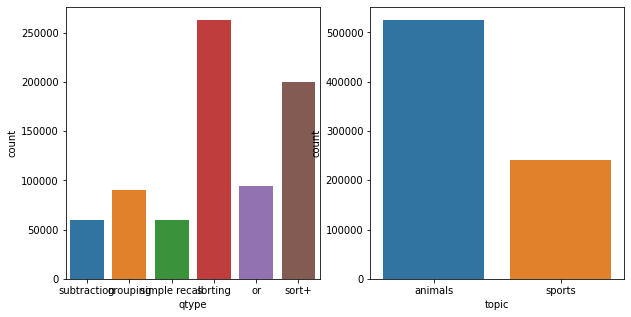

In [15]:
fig,ax=plt.subplots(ncols=2,figsize=(10,5))
ax[0]=sns.countplot(x=aug_df.qtype,ax=ax[0])
ax[1]=sns.countplot(x=aug_df.topic,ax=ax[1])